In [164]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv("data/city_data.csv")
city.head()

ride = pd.read_csv("data/ride_data.csv")
ride.head()
        
# Combine the data into a single dataset 

combined_data = pd.merge(city, ride, on="city")
#combined_data = combined_data.drop_duplicates()

# Display the data table for preview
combined_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [165]:
#here have more than one city index

city_group = combined_data.groupby(["city","driver_count","type"])

ride_summary = pd.DataFrame()
ride_summary["Total Rides (per City)"] = city_group["ride_id"].count()
ride_summary["Average Fare ($)"] = city_group["fare"].mean()
ride_summary["Total Fare ($)"] = city_group["fare"].sum()
ride_summary = ride_summary.reset_index()


ride_summary.head()


,city,driver_count,type,Total Rides (per City),Average Fare ($),Total Fare ($)
0,Amandaburgh,12,Urban,18,24.641667,443.55
1,Barajasview,26,Urban,22,25.332273,557.31
2,Barronchester,11,Suburban,16,36.422500,582.76
3,Bethanyland,22,Suburban,18,32.956111,593.21
4,Bradshawfurt,7,Rural,10,40.064000,400.64


## Bubble Plot of Ride Sharing Data

In [166]:
# Obtain the x and y coordinates for each of the three city types 
#isolate city types - urban

new_df_urban = ride_summary.loc[ride_summary['type'] == 'Urban']

av_fare_urban = new_df_urban.groupby('city')['Average Fare ($)'].mean()

total_rides_urban = new_df_urban.groupby('city')['Total Rides (per City)'].sum()

driver_count_urban = new_df_urban.groupby('city')['driver_count'].mean()

driver_count_urban.head()



city
Amandaburgh        12
Barajasview        26
Carriemouth        52
Christopherfurt    41
Deanville          49
Name: driver_count, dtype: int64

In [167]:
#isolate city types - rural

new_df_rural = ride_summary.loc[ride_summary['type'] == 'Rural']

av_fare_rural = new_df_rural.groupby('city')['Average Fare ($)'].mean()

total_rides_rural = new_df_rural.groupby('city')['Total Rides (per City)'].sum()

driver_count_rural = new_df_rural.groupby('city')['driver_count'].mean()

driver_count_rural.head()

city
Bradshawfurt      7
Garzaport         7
Harringtonfort    4
Jessicaport       1
Lake Jamie        4
Name: driver_count, dtype: int64

In [168]:
#isolate city types - Suburban

new_df_suburban = ride_summary.loc[ride_summary['type'] == 'Suburban']

av_fare_suburban = new_df_suburban.groupby('city')['Average Fare ($)'].mean()

total_rides_suburban = new_df_suburban.groupby('city')['Total Rides (per City)'].sum()

driver_count_suburban = new_df_suburban.groupby('city')['driver_count'].mean()

driver_count_suburban.head()

city
Barronchester    11
Bethanyland      22
Brandonfort      10
Colemanland      23
Davidfurt        23
Name: driver_count, dtype: int64

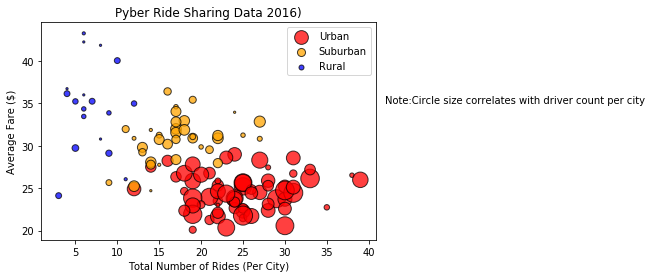

In [175]:
# Build the scatter plots for each city types

plt.scatter(total_rides_urban, av_fare_urban, marker="o", facecolors="red", edgecolors="black", label='Urban',
            s=driver_count_urban*5, alpha=0.75)

plt.scatter(total_rides_suburban, av_fare_suburban, marker="o", facecolors="orange", edgecolors="black", label='Suburban',
            s=driver_count_suburban*5, alpha=0.75)

plt.scatter(total_rides_rural, av_fare_rural, marker="o", facecolors="blue", edgecolors="black", label='Rural',
            s=driver_count_rural*5, alpha=0.75)


# Incorporate the other graph properties
# Create a legend
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend(loc='upper right')
plt.title("Pyber Ride Sharing Data 2016)")
plt.text(42, 35, "Note:Circle size correlates with driver count per city")

# Incorporate a text label regarding circle size
#Circle size correlates with driver count per city  
# Save Figure
plt.savefig("../Images/Pyber.png")

In [154]:
# Show plot
plt.show()

## Total Fares by City Type

In [155]:
# Calculate Type Percents
fare_sum = ride_summary['Total Fare ($)'].sum()

# Create a group based on the values in the 'type' column
fare_total = ride_summary.groupby('type')['Total Fare ($)'].sum()

drive_count = combined_data["type"].value_counts() 

percent = fare_total / fare_sum * 100

ride_df = pd.DataFrame({'Fare Total': fare_total, 'Percent': percent})

ride_df



,Fare Total,Percent
type,,
Rural,4327.93,6.811493
Suburban,19356.33,30.463872
Urban,39854.38,62.724635


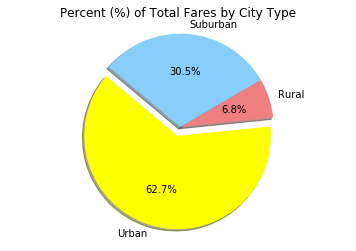

In [156]:
# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [39854.38, 4327.93, 19356.33]

# The colors of each section of the pie chart
colors = ["yellow", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.title("Percent (%) of Total Fares by City Type")

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/total_fares.png")

In [157]:
# Show Figure
plt.show()

## Total Rides by City Type

In [158]:
# Calculate Ride Percents
ride_sum = ride_summary['Total Rides (per City)'].sum()


# Create a group based on the values in the 'type' column
ride_city = ride_summary.groupby('type')['Total Rides (per City)'].sum()

#ride_city

ride_count = combined_data['type'].value_counts() 

percent_ride = ride_count / ride_sum * 100

ride_df = pd.DataFrame({'Ride Total': ride_city, 'Percent': percent_ride})

ride_df


,Ride Total,Percent
Rural,125,5.263158
Suburban,625,26.315789
Urban,1625,68.421053


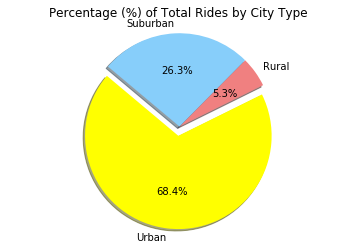

In [159]:
# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [1625, 125, 625]

# The colors of each section of the pie chart
colors = ["yellow", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.title("Percentage (%) of Total Rides by City Type")

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/total_fares.png")

In [160]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [161]:
# Calculate Driver Percents
driver_sum = ride_summary['driver_count'].sum()


#unique_drivers = len(ride_summary["driver_count"].unique())

#unique_drivers

driver_total = ride_summary.groupby('type').sum()['driver_count']

#driver_total

#doesn't add up to 52 - haven't summed up unique values. 

#percent_sum = ride_summary.groupby('type')['driver_count'].count()

percent_drivers = driver_total/driver_sum * 100

summary_drive = pd.DataFrame({'Total Drivers': driver_total, 'Percent': percent_drivers})

summary_drive


,Total Drivers,Percent
type,,
Rural,78,2.623613
Suburban,490,16.481668
Urban,2405,80.894719


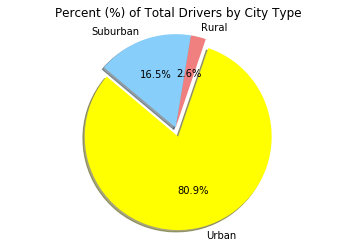

In [162]:
# Build Pie Charts
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [2405, 78, 490]

# The colors of each section of the pie chart
colors = ["yellow", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Percent (%) of Total Drivers by City Type")

# Save Figure
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/total_drivers.png")

In [163]:
# Show Figure
plt.show()